# **Capstone project: Providing data-driven suggestions for HR**

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [105]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0=df0.rename(columns={'Work_accident':'work_accident','Department':'department',"time_spend_company":'tenure'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df=df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

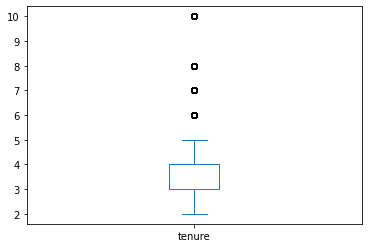

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
df['tenure'].plot(kind='box')

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
Q1,Q3=np.percentile(df['tenure'],[25,75])
IQR=Q3-Q1
threshold=1.5
lower_limit=Q1-(threshold*IQR)
upper_limit=Q3+(threshold*IQR)
outliers=df[(df['tenure']<lower_limit) | (df['tenure']>upper_limit)]
print(outliers.head())
print("Number of rows having containing outlier are :"+str(len(outliers)))

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
1                 0.80             0.86               5                   262   
17                0.78             0.99               4                   255   
34                0.84             0.87               4                   246   
47                0.57             0.70               3                   273   
67                0.90             0.98               4                   264   

    tenure  work_accident  left  promotion_last_5years   department  salary  
1        6              0     1                      0        sales  medium  
17       6              0     1                      0        sales     low  
34       6              0     1                      0           hr     low  
47       6              0     1                      0      support     low  
67       6              0     1                      0  product_mng  medium  
Number of rows having containing outlier are 

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

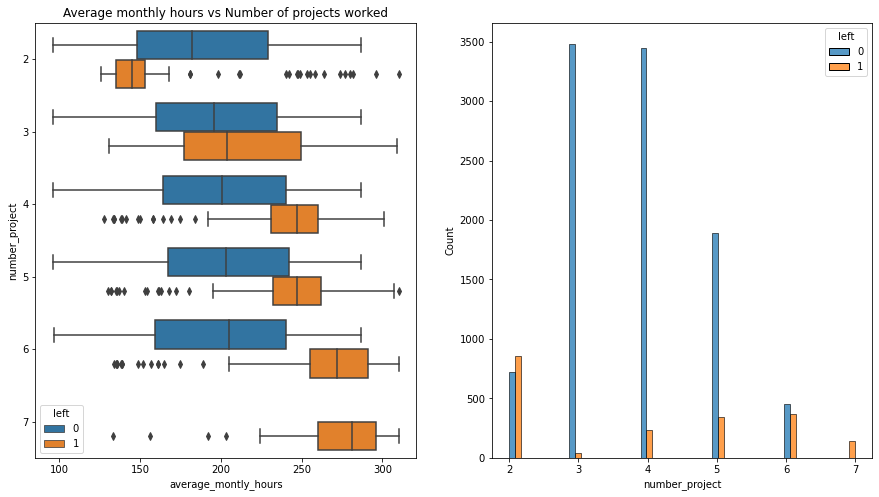

In [51]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.boxplot(x=df['average_montly_hours'],y=df['number_project'],data=df,hue='left',ax=axes[0],orient='h')
axes[0].set_title('Average monthly hours vs Number of projects worked')
sns.histplot(x='number_project',hue='left',data=df,ax=axes[1],multiple='dodge')

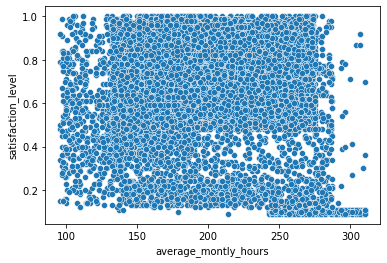

In [53]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(x='average_montly_hours',y='satisfaction_level',data=df)

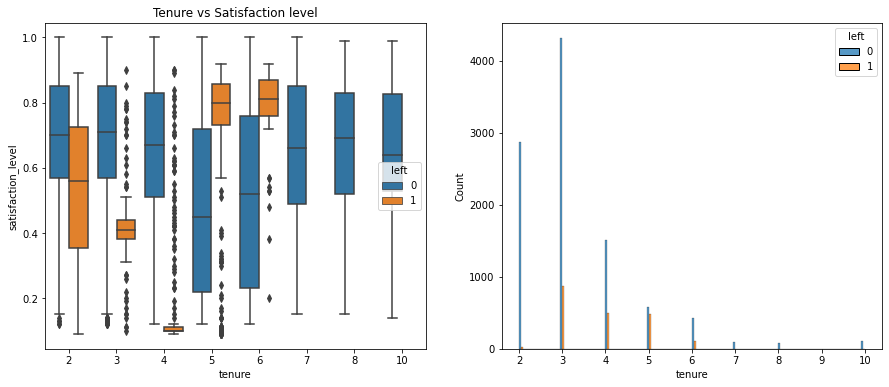

In [59]:
# Create a plot as needed
### YOUR CODE HERE ###
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x='tenure',y='satisfaction_level',data=df,ax=axes[0],hue='left')
axes[0].set_title("Tenure vs Satisfaction level")
sns.histplot(x='tenure',data=df,hue='left',ax=axes[1],multiple='dodge')

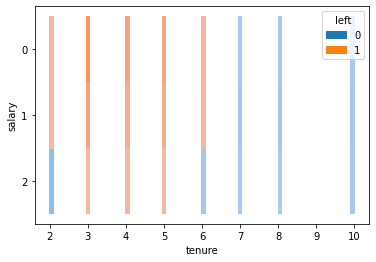

In [61]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(x='tenure',y='salary',data=df,hue='left')
plt.title('Tenure vs Salary')

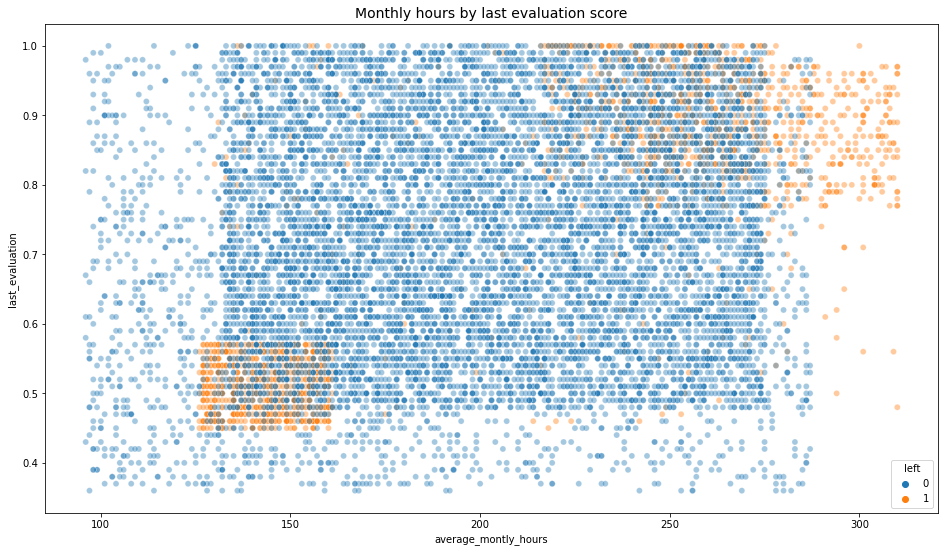

In [64]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_montly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.title('Monthly hours by last evaluation score', fontsize='14');

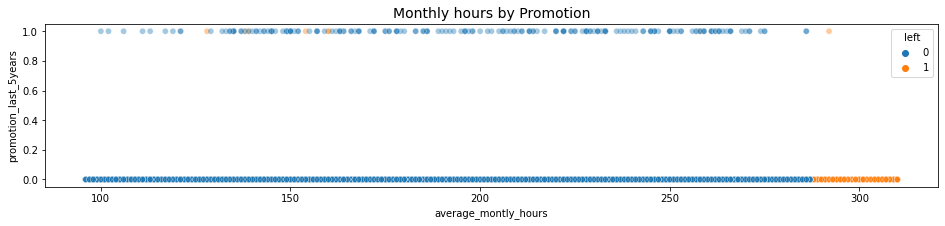

In [67]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_montly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.title('Monthly hours by Promotion', fontsize='14');

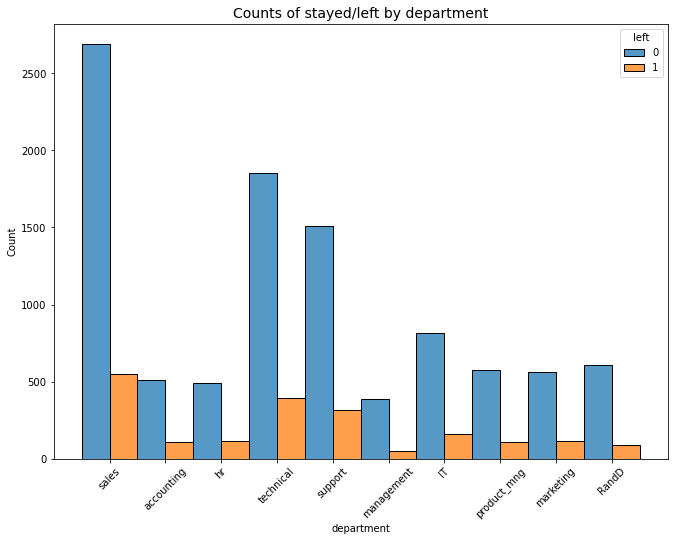

In [69]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(11,8))
sns.histplot(data=df, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge')
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=14);

Text(0.5, 1.0, 'Heat Map for numerical columns')

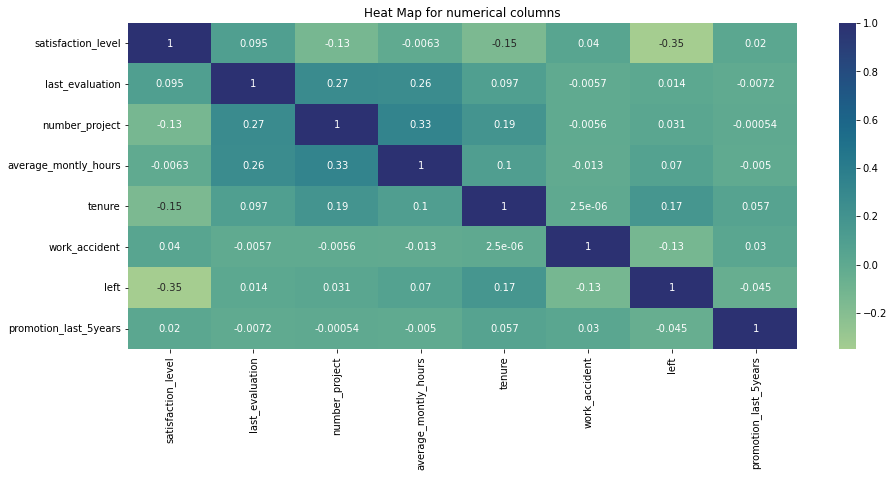

In [72]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.title('Heat Map for numerical columns')

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [17]:
salary_map={'low':'0','medium':'1',"high":'2'}
df['salary']=df['salary'].map(salary_map)
df['salary']

0        0
1        1
2        1
3        0
4        0
        ..
11995    2
11996    2
11997    2
11998    2
11999    0
Name: salary, Length: 11991, dtype: object

In [18]:
#Creatig dummies for categorical values
df_dummies=pd.get_dummies(df,columns=['salary','department'],drop_first=True,dtype='int')
df_dummies.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary_1,salary_2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
df_dummies.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'salary_1', 'salary_2', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

Text(0.5, 1.0, 'Heatmap')

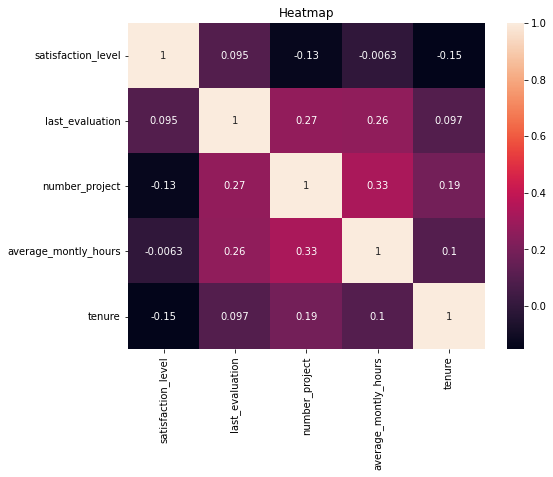

In [39]:
#Heatmap to understand the correlation between numerical values
plt.figure(figsize=(8,6))
sns.heatmap(df_dummies[['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'tenure']].corr(),annot=True)
plt.title('Heatmap')

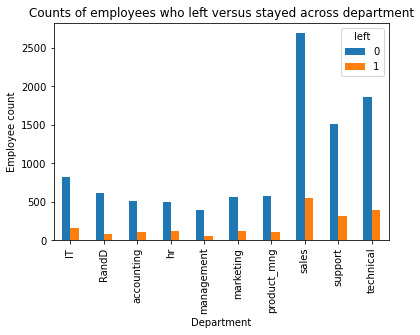

In [41]:
# retained or Left employees against department
pd.crosstab(df['department'],df['left']).plot(kind='bar')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [42]:
#Extracting outliers and dropping
print(df_dummies.shape)
outliers=df_dummies[(df_dummies['tenure']<lower_limit) | (df_dummies['tenure']>upper_limit)]
df_no_outliers=df_dummies.drop(outliers.index)
df_no_outliers.shape

(11991, 19)


(11167, 19)

In [43]:
#Splitting independent and dependent variables
y=df_no_outliers['left']
x=df_no_outliers.drop(columns='left')

In [44]:
#splitting data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [45]:
df_no_outliers.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
tenure                      int64
work_accident               int64
left                        int64
promotion_last_5years       int64
salary_1                    int64
salary_2                    int64
department_RandD            int64
department_accounting       int64
department_hr               int64
department_management       int64
department_marketing        int64
department_product_mng      int64
department_sales            int64
department_support          int64
department_technical        int64
dtype: object

## Logistic Regression

In [46]:
# Creating the model instance and fitting the training values
LR=LogisticRegression(random_state=42,max_iter=500)
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# Predicting the values using test data
y_LR_pred=LR.predict(x_test)
y_LR_pred

array([0, 1, 0, ..., 0, 0, 0])

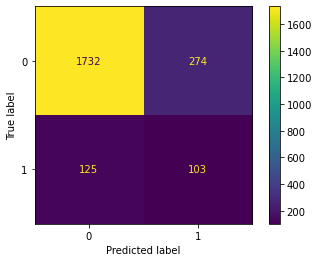

In [50]:
#Confusion Matrix Display
cm=confusion_matrix(y_LR_pred,y_test,labels=LR.classes_)
dist=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR.classes_)
dist.plot(values_format='')

In [53]:
#Classification Report
target_names=['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_LR_pred,y_test,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.93      0.86      0.90      2006
    Predicted would leave       0.27      0.45      0.34       228

                 accuracy                           0.82      2234
                macro avg       0.60      0.66      0.62      2234
             weighted avg       0.87      0.82      0.84      2234



In [57]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,promotion_last_5years,salary_1,salary_2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

## Descison Tree Classifier

In [59]:
#Creating the model instance
DT=DecisionTreeClassifier(random_state=0)

In [62]:
# Hyper parameter tuning
params={'max_depth':[4,6,8,None],'min_samples_leaf':[2,5,1],'min_samples_split':[2,4,6]}
scoring={'precision','recall','accuracy','f1','roc_auc'}
tree_cv=GridSearchCV(DT,params,scoring=scoring,cv=5,refit='roc_auc')

In [63]:
# fitting the model
%%time
tree_cv.fit(x_train,y_train)

CPU times: user 3.5 s, sys: 0 ns, total: 3.5 s
Wall time: 3.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [68]:
# Best Parameters identified
tree_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [64]:
# Best Estimators of generated tree
tree_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [65]:
# Best score of the decison tree
tree_cv.best_score_

0.9738374951264243

In [66]:
# Results of the Decision tree
tree_cv.cv_results_

{'mean_fit_time': array([0.00850949, 0.00817037, 0.00811362, 0.00810103, 0.00832653,
        0.0088778 , 0.00827456, 0.00803461, 0.00810838, 0.01095948,
        0.01095362, 0.01085482, 0.0113852 , 0.01092978, 0.01089506,
        0.01083193, 0.01095757, 0.01105237, 0.01400332, 0.01366739,
        0.01377168, 0.01384196, 0.01355224, 0.01393304, 0.01381035,
        0.01371245, 0.01371341, 0.01889567, 0.01968098, 0.01896968,
        0.01864643, 0.01859355, 0.01900177, 0.02051067, 0.02008657,
        0.02038703]),
 'std_fit_time': array([8.32637374e-04, 5.29248434e-05, 5.19686879e-05, 8.74947981e-05,
        2.96282338e-04, 6.97181624e-04, 4.50992751e-04, 9.47107835e-05,
        4.31204240e-05, 1.23872859e-04, 1.47114998e-04, 7.35196617e-05,
        5.41611073e-04, 1.28139498e-04, 8.89662881e-05, 9.89701454e-05,
        1.57096649e-04, 6.45523752e-05, 2.91884695e-04, 7.30049057e-05,
        1.06037756e-04, 1.11994077e-04, 8.22203884e-05, 5.77897533e-04,
        1.90335057e-04, 6.34583017e-0

In [75]:
# Create a DataFrame out of results to understand different metrics
def make_results(model_name:str,model_object,metric:str):
    metrics={'auc':'mean_test_roc_auc','precision':'mean_test_precision','recall':'mean_test_recall','f1':'mean_test_f1','accuracy':'mean_test_accuracy'}
    
    cv_results=pd.DataFrame(model_object.cv_results_)
    tree_cv_best_estimator_results=cv_results.iloc[cv_results[metrics[metric]].idxmax(),:]
    
    f1=tree_cv_best_estimator_results.mean_test_f1
    recall=tree_cv_best_estimator_results.mean_test_recall
    precision=tree_cv_best_estimator_results.mean_test_precision
    accuracy=tree_cv_best_estimator_results.mean_test_accuracy
    auc=tree_cv_best_estimator_results.mean_test_roc_auc
    
    result_table=pd.DataFrame({'model':model_name,'f1':[f1],'recall':[recall],'precision':[precision],'accuracy':[accuracy],'auc':[auc]})
    return result_table

In [76]:
# Resultant DataFrame with metrics
make_results('Decision Tree Classifier',tree_cv,'auc')

,model,f1,recall,precision,accuracy,auc
0,Decision Tree Classifier,0.934873,0.916279,0.954305,0.978506,0.973837


## Random Forest Classifier

In [81]:
# Creating the model instance
RF=RandomForestClassifier(random_state=0)

In [88]:
# Hyper parameter tuning with GridSearchCV
params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring={'precision','recall','accuracy','f1','roc_auc'}

RF_cv=GridSearchCV(RF,params,scoring=scoring,cv=4,refit='roc_auc')

In [89]:
RF_cv.fit(x_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [90]:
# random Forest model best estimators
RF_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
# Random Forest model best score
RF_cv.best_score_

0.9829087654486057

In [92]:
# random Forest model best parameters
RF_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [97]:
# Making DataFrames for Decision Tree and Random Forest Results
rf_cv_results=make_results('Random Forest Classifier',RF_cv,'auc')
dt_cv_results=make_results('Decision Tree Classifier',tree_cv,'auc')

In [99]:
# Comparing Decision Tree and Random Forest reuslts
rf_cv_results.append(dt_cv_results)

,model,f1,recall,precision,accuracy,auc
0,Random Forest Classifier,0.937361,0.910291,0.966209,0.979514,0.982909
0,Decision Tree Classifier,0.934873,0.916279,0.954305,0.978506,0.973837


In [100]:
# Predicting with Random Forest with test data
y_rf_pred=RF_cv.predict(x_test)
y_rf_pred

array([0, 1, 0, ..., 0, 0, 0])

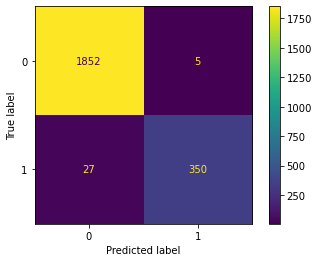

In [103]:
# Confusion Matrix Display
cm=confusion_matrix(y_test,y_rf_pred,labels=RF_cv.classes_)
dist=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF_cv.classes_)
dist.plot(values_format='')

In [104]:
# Classification report display
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1857
           1       0.99      0.93      0.96       377

    accuracy                           0.99      2234
   macro avg       0.99      0.96      0.97      2234
weighted avg       0.99      0.99      0.99      2234



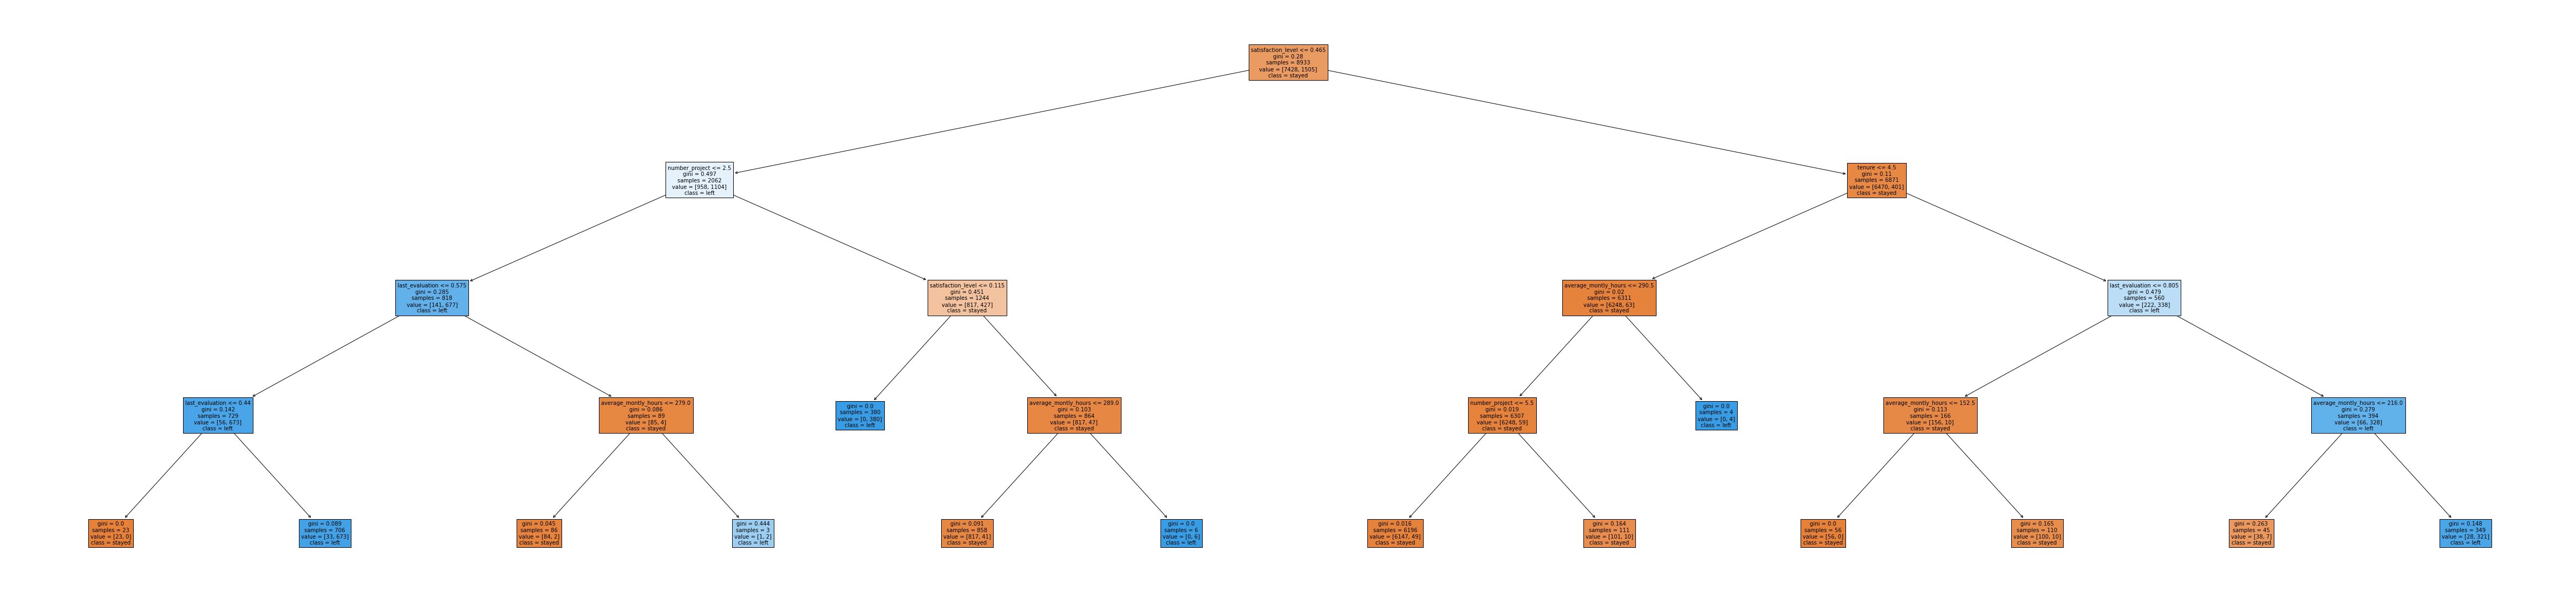

In [108]:
# Plotting the tree
plt.figure(figsize=(85,20))
plot_tree(tree_cv.best_estimator_,max_depth=6,filled=True,feature_names=x.columns,class_names={0:'stayed',1:'left'},fontsize=10)
plt.show()

In [112]:
# Understanding the feature importances of different features with tree based model 
feature_importances=pd.DataFrame(tree_cv.best_estimator_.feature_importances_,columns=['gini_importances'],index=x.columns)
feature_importances.sort_values('gini_importances')

,gini_importances
salary_2,0.000000
department_sales,0.000000
department_product_mng,0.000000
department_marketing,0.000000
department_management,0.000000
department_hr,0.000000
department_accounting,0.000000
department_RandD,0.000000
department_technical,0.000000
salary_1,0.000000


Text(0, 0.5, 'Features')

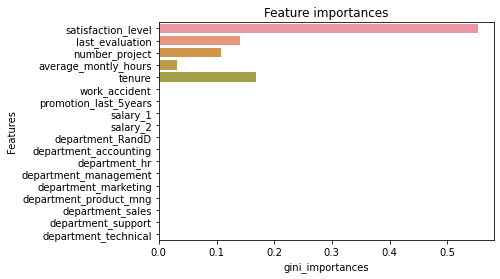

In [115]:
# plotting the feature importances obtained from Decision Tree
sns.barplot(x='gini_importances',y=feature_importances.index,data=feature_importances)
plt.title('Feature importances')
plt.ylabel('Features')

In [117]:
# Understanding the feature importances of different features with Random Forest Classifier
rf_feature_importances=pd.DataFrame(RF_cv.best_estimator_.feature_importances_,columns=['gini_importances'],index=x.columns)
rf_feature_importances

,gini_importances
satisfaction_level,0.528162
last_evaluation,0.124277
number_project,0.129857
average_montly_hours,0.051204
tenure,0.165122
work_accident,0.000011
promotion_last_5years,0.000002
salary_1,0.000127
salary_2,0.000189
department_RandD,0.000127


Text(0, 0.5, 'Features')

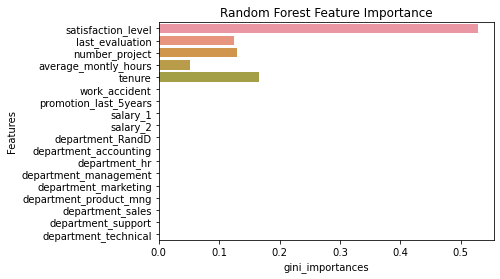

In [119]:
# plotting the feature importances obtained from Random Forest
sns.barplot(x='gini_importances',y=rf_feature_importances.index,data=rf_feature_importances)
plt.title('Random Forest Feature Importance')
plt.ylabel('Features')

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






Double-click to enter your responses here.

In [121]:
rf_cv_results.append(dt_cv_results)

,model,f1,recall,precision,accuracy,auc
0,Random Forest Classifier,0.937361,0.910291,0.966209,0.979514,0.982909
0,Decision Tree Classifier,0.934873,0.916279,0.954305,0.978506,0.973837


In [122]:
print(classification_report(y_LR_pred,y_test,target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.93      0.86      0.90      2006
    Predicted would leave       0.27      0.45      0.34       228

                 accuracy                           0.82      2234
                macro avg       0.60      0.66      0.62      2234
             weighted avg       0.87      0.82      0.84      2234



In [123]:
accuracy_score(y_LR_pred,y_test)

0.8213965980304386

### Summary of model results

[Double-click to enter your summary here.]
Logistic Regression

The logistic regression model achieved precision of 93%, recall of 86%, f1-score of 90% (all weighted averages), and accuracy of 82%, on the test data.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 97.3%, precision of 95.4%, recall of 91.6%, f1-score of 93.4%, and accuracy of 97.8%, on the test set. The random forest results are best compared to decision tree with AUC of 98.2%, precision of 96.6%, recall of 91%, f1-score of 93.7%, and accuracy of 97.9%

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]
To retain employees, following recommendations will be provided

1. Understanding and appreciating the overwork nature of the employees makes employees retain
2. Limiting the projects and work hours improve the employees performance
3. Regular counselling and training programs make employees work efficiently
4. Providing Awards for long term employees makes them enthusiastic.